In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt



In [4]:
# Load the data
# Assuming you have a CSV file named 'fraud_data.csv'
data = pd.read_csv('Fraud_check.csv')



In [5]:
# Display the first few rows of the dataset
print(data.head())



  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


In [6]:
# Data Preprocessing
# Assume 'Taxable.Income' is the target variable
data['Income_Category'] = pd.cut(data['Taxable.Income'], bins=[-float('inf'), 30000, float('inf')], labels=['Risky', 'Good'])



In [7]:
# Drop the original 'Taxable.Income' column
data.drop('Taxable.Income', axis=1, inplace=True)



In [8]:
# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)



In [9]:
# Split the data into features (X) and target variable (y)
X = data.drop('Income_Category', axis=1)
y = data['Income_Category']



In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
X_train
X_test

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
110,32450,19,0,0,1,1
419,138074,20,0,1,0,0
565,31064,28,0,0,0,0
77,118344,26,1,1,0,0
181,36116,20,0,0,0,0
...,...,...,...,...,...,...
399,74497,21,0,0,1,0
340,54437,21,1,1,0,1
148,197038,21,0,1,0,0
494,197045,13,0,0,1,1


In [12]:
y_test
y_train

145     Good
9       Good
375     Good
523     Good
188    Risky
       ...  
71      Good
106    Risky
270     Good
435     Good
102     Good
Name: Income_Category, Length: 480, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [13]:
# Build a Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [16]:
# Predictions on the test set
y_pred = tree_model.predict(X_test)
y_pred






array(['Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 

In [17]:

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [18]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.6666666666666666
Confusion Matrix:
[[76 18]
 [22  4]]
Classification Report:
              precision    recall  f1-score   support

        Good       0.78      0.81      0.79        94
       Risky       0.18      0.15      0.17        26

    accuracy                           0.67       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.65      0.67      0.66       120



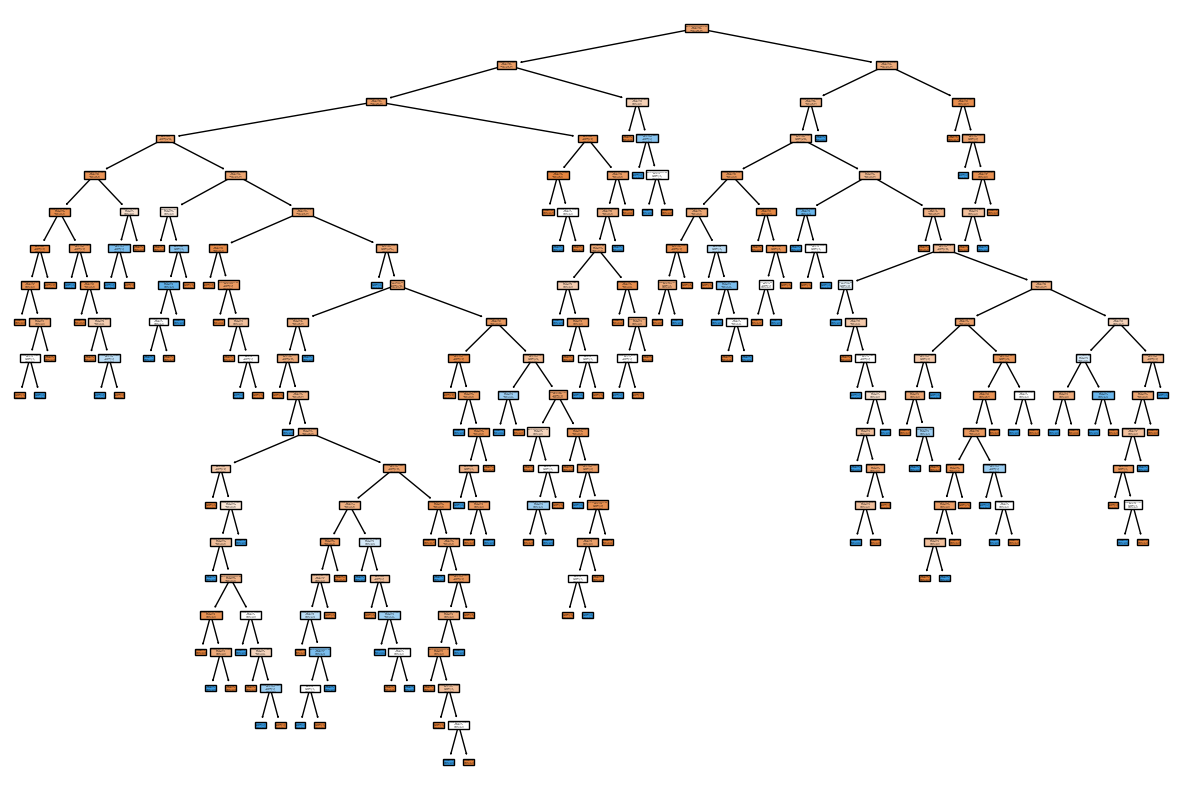

In [19]:
# Visualization: Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=data['Income_Category'].cat.categories)
plt.show()

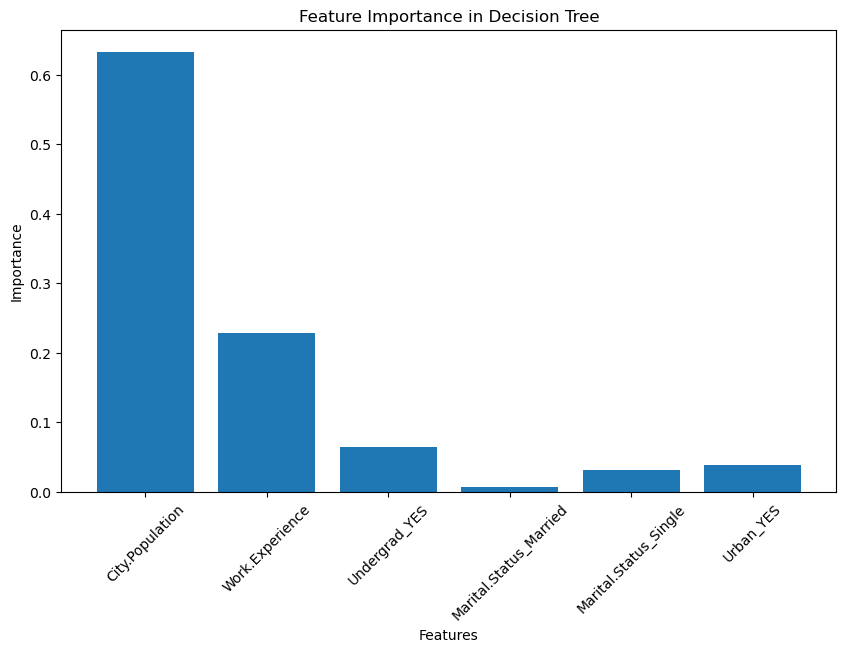

In [20]:
# Feature Importance
feature_importance = tree_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=45)
plt.show()


In [22]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_probs = tree_model.predict_proba(X_test)[:, 1]




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


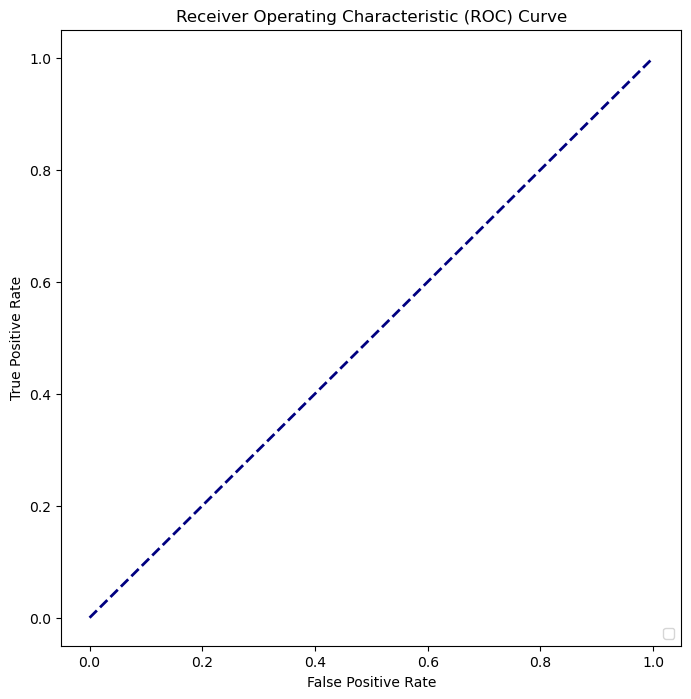

In [26]:
# Plot ROC Curve
plt.figure(figsize=(8, 8))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

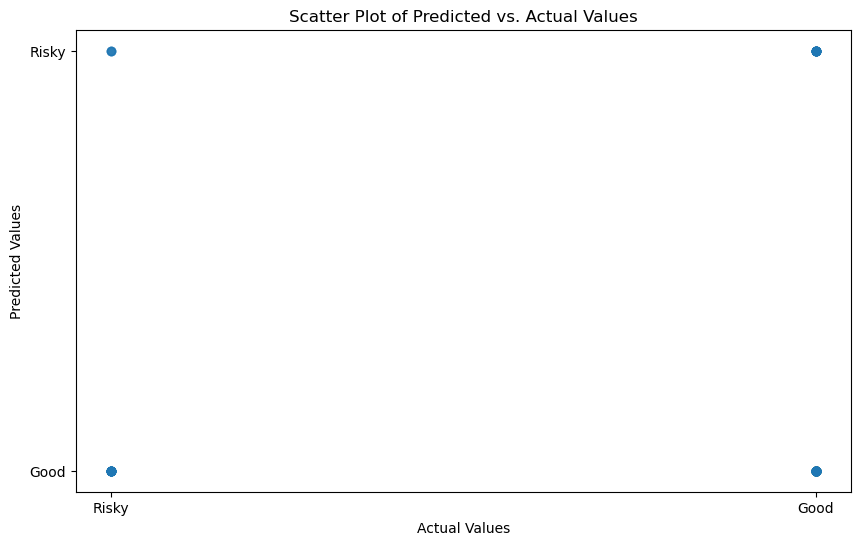

In [27]:
# Scatter Plot of Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()


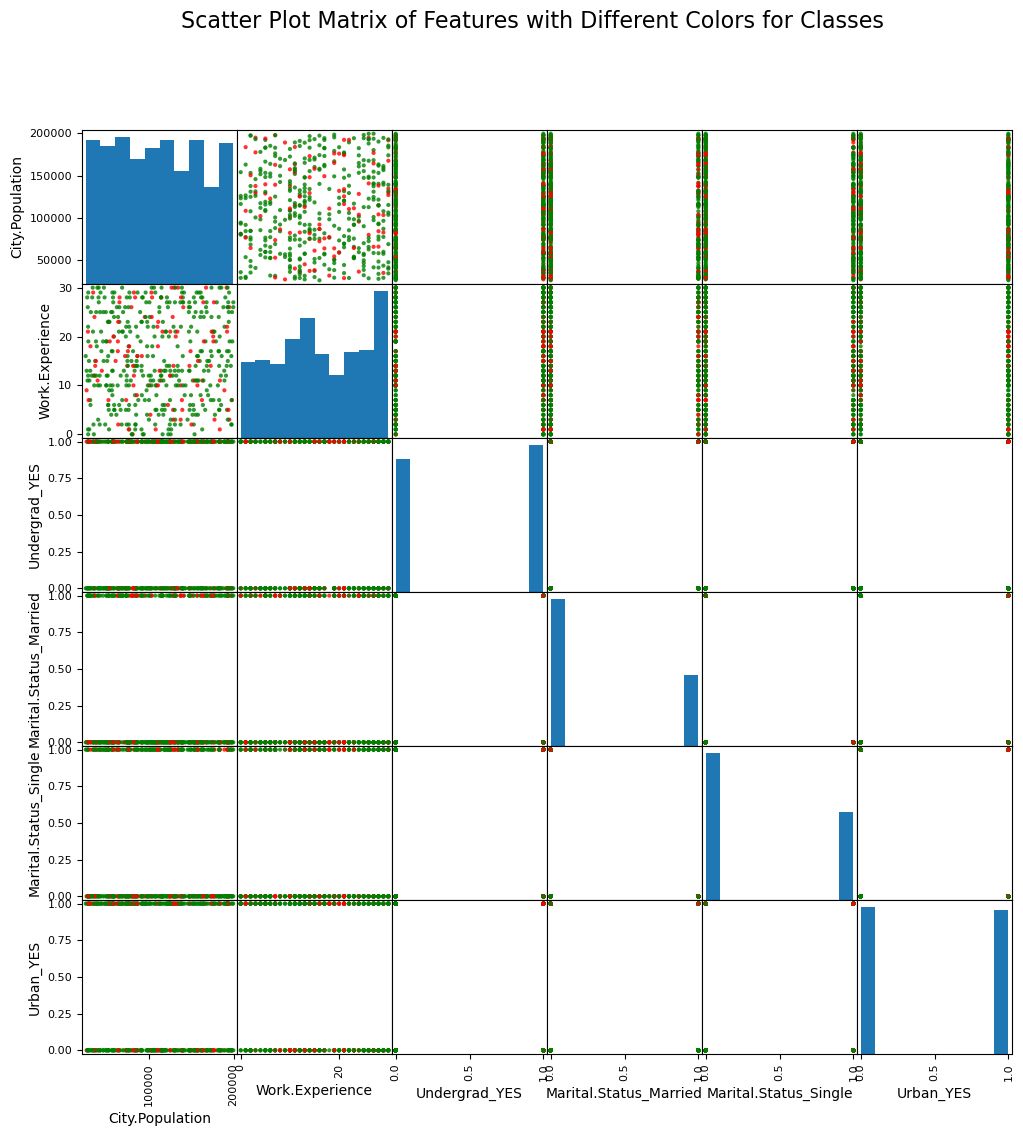

In [28]:
# Scatter Plot of Features with Different Colors for Classes
from pandas.plotting import scatter_matrix

# Combine features and target variable for plotting
plot_data = pd.concat([X_train, y_train], axis=1)

# Scatter Matrix with different colors for classes
colors = {'Risky': 'red', 'Good': 'green'}
scatter_matrix(plot_data, alpha=0.8, figsize=(12, 12), diagonal='hist', c=plot_data['Income_Category'].map(colors))
plt.suptitle('Scatter Plot Matrix of Features with Different Colors for Classes', size=16)
plt.show()
